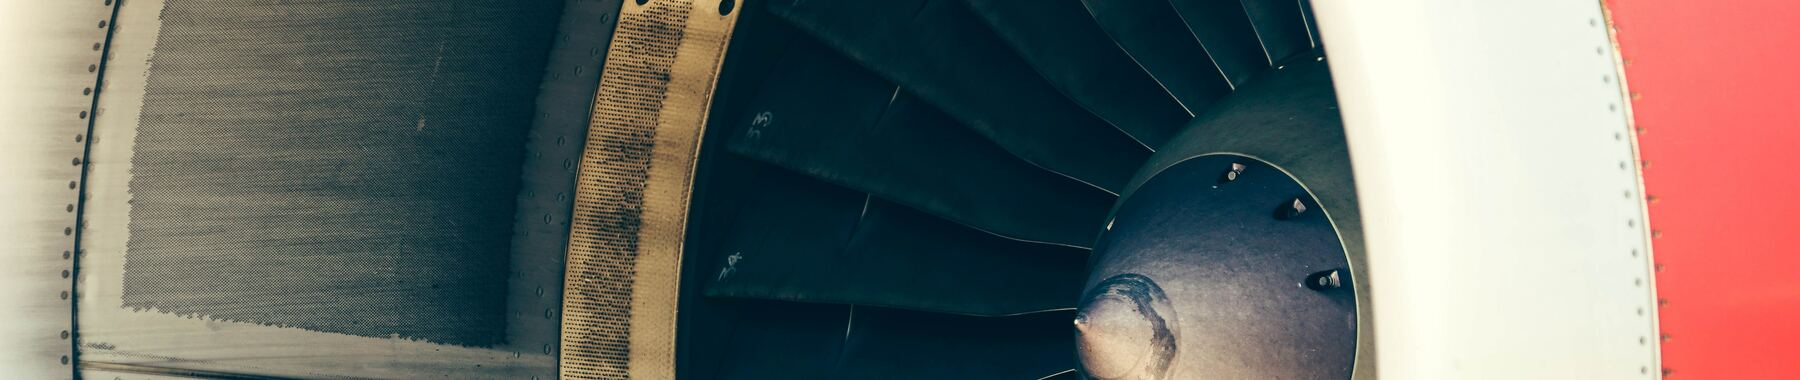

##  Достоверная оценка оставшегося ресурса сложных технических систем
обещает значительную экономию средств (например,избегая внепланового обслуживания и уменьшая простои оборудования), а также улучшение эксплуатационной безопасности. Оценка оставшегося ресурса сложного агрегата, например реактивного авиадвигателя предоставляет лицам, принимающим решения,информацию, позволяющую им изменить операционные характеристики (такие как нагрузка), которые в свою очередь могут продлить жизнь компонента. Это также позволяет лицам, участвующим в планировании процессов эксплуатации борудования учитывать предстоящее техническое обслуживание и запуск логистического процесса.Достоверная оценка оставшегося ресурса сложных технических систем поддерживает плавный переход от  оборудования, требующего обслуживания к полностью работоспособному. Авиационные двигатели, медицинское оборудование, электростанции и т. д., вот лишь некоторые из распространенных примеров такого оборудования.

## Описание набора данных.

Наборы данных состоят из нескольких многомерных временных рядов. Каждый набор данных далее делится на обучающие и тестовые подмножества. Данные можно считать взятыми из парка двигателей одного типа. Каждый двигатель запускается с различными степенями начального износа и производственного отклонения, которые неизвестны пользователю. Этот износ и отклонение считается нормальным, то есть не считается неисправным состоянием. Существует три режима работы, которые существенно влияют на производительность двигателя. Эти настройки также включены в данные. Данные загрязнены шумами датчиков. Двигатель работает нормально в начале каждого временного ряда, и в какой-то момент в течение ряда возникает неисправность. В обучающем наборе неисправность возрастает по величине до отказа системы. В тестовом наборе временной ряд заканчивается за некоторое время до сбоя системы. Цель работы состоит в том, чтобы предсказать количество оставшихся рабочих циклов до сбоя в тестовом наборе, то есть количество рабочих циклов после последнего цикла тестового набора, в течение которого двигатель будет продолжать работать. Также предоставлен вектор истинных значений оставшегося срока полезного использования (RUL) для тестовых данных.

Данные представлены в виде текстового файла с 26 столбцами чисел, разделенных пробелами. Каждая строка представляет собой снимок данных, взятых в течение одного рабочего цикла. Столбцы соответствуют:

1)	unit number

2)	time, in cycles

3)	operational setting 1

4)	operational setting 2

5)	operational setting 3

6)	sensor measurement  1

7)	sensor measurement  2

...

26)	sensor measurement  26


## Знакомство с данными

In [1]:
import pandas as pd

In [4]:
fd_001_train = pd.read_csv('C:/Users/Игорь/Downloads/nasa-cmaps/CMaps/train_FD001.txt',header=None,sep=' ')

In [6]:
fd_001_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [11]:
# удалим пустые колонки
fd_001_train.drop(columns=[26,27],inplace=True)

In [46]:
# сформируем 2 серии для дальнейшей визуализации параметров
series_1 = fd_001_train[fd_001_train[0]==1]
series_2 = fd_001_train[fd_001_train[0]==2]

In [47]:
series_1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [48]:
#удаление колонок с номером серии и порядковым номером цикла
X1 = series_1.drop(columns=[0,1])
X2 = series_2.drop(columns=[0,1])

In [49]:
X1.head()

,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,25
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [50]:
# применим масштабирование к переменным для дальнейшего построения графика суммы всех параметров
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()
X1 = sc.fit_transform(X1)
X2 = sc.fit_transform(X2)

C:\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Miniconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Miniconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [52]:
sum_x1 = X1.sum(axis=1)
sum_x2 = X2.sum(axis=1)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

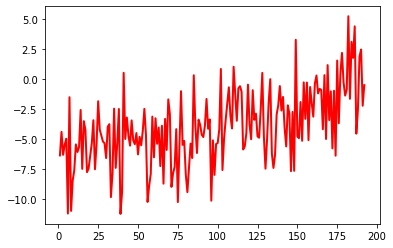

In [57]:
# график суммы параметров для 1 серии
plt.plot(x1, sum_x1, c="r", linewidth=2)

In [55]:
x1 = np.linspace(1, len(sum_x1), len(sum_x1))[:, np.newaxis]
x2 = np.linspace(1, len(sum_x2), len(sum_x2))[:, np.newaxis]

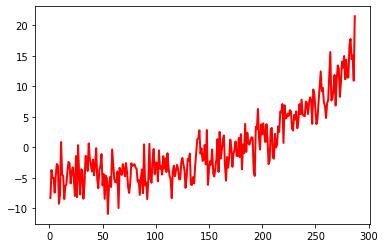

In [56]:
plt.plot(x2, sum_x2, c="r", linewidth=2)

## Как видно данные сильно зашумлены высокочастотной составляющей от датчиков, различных условий испытания, промежуточных техобслуживаний и т.п.
применим один из простейших фильтров для сглаживания высокочастотных колебаний - скользящую среднюю

In [267]:
#функция построения скользящей средней
def SMA(data,period):
    sma=[]
    sma.append(sum(data[:period]) / period)
    for i in range(len(data) - period):
        sma.append(sma[i] + data[period + i] / period - data[i] / period)
    return sma
        

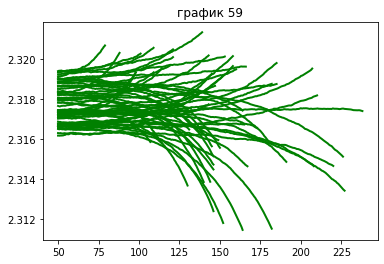

In [274]:
#совместный для нескольких серий график для суммы параметров серии
period = 50
for i in range(1,60):
    series = fd_001_train[fd_001_train[0]==i]
    X = series.drop(columns=[0,1])
    X = normalize(X)
    sum_x = X.sum(axis=1)
    x = np.linspace(period, len(sum_x) - period + 1, len(sum_x) - period + 1)[:, np.newaxis]
    plt.title(f'график {i}')
    avg_x = SMA(sum_x,period)
    plt.plot(x, avg_x, c="g", linewidth=2)
plt.show()

## Посмотрим данные другого набора

In [281]:
fd_003_train = pd.read_csv('C:/Users/Игорь/Downloads/nasa-cmaps/CMaps/train_FD003.txt',header=None,sep=' ')
fd_003_test = pd.read_csv('C:/Users/Игорь/Downloads/nasa-cmaps/CMaps/test_FD003.txt',header=None,sep=' ')

In [282]:
fd_003_train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,NaN,NaN
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,NaN,NaN
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,NaN,NaN
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,NaN,NaN
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,NaN,NaN


In [283]:
fd_003_train.drop(columns=[26,27],inplace=True)

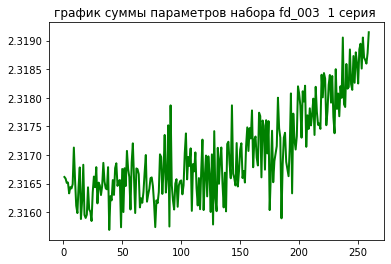

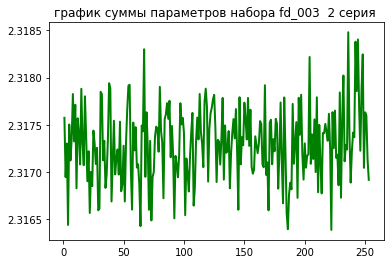

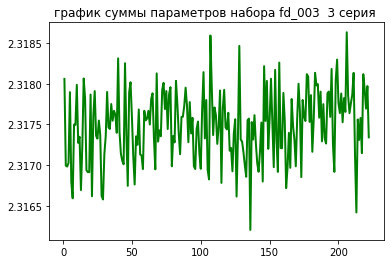

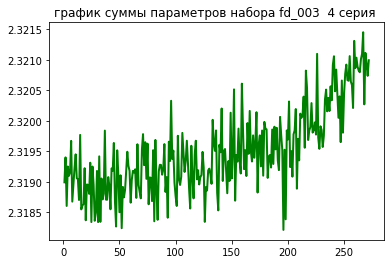

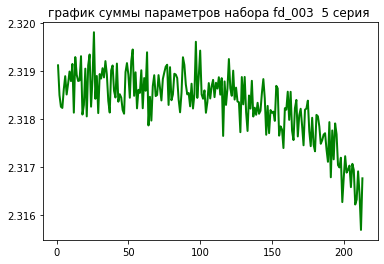

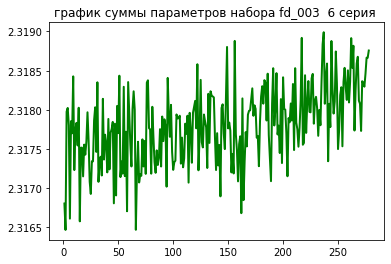

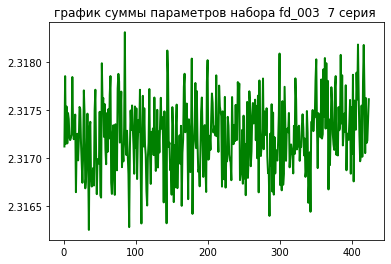

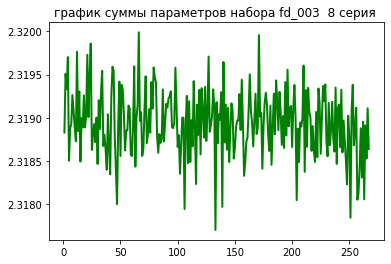

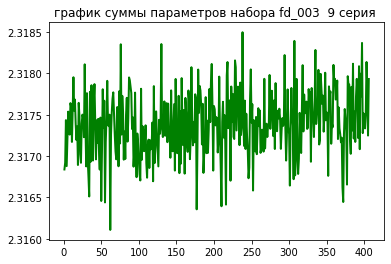

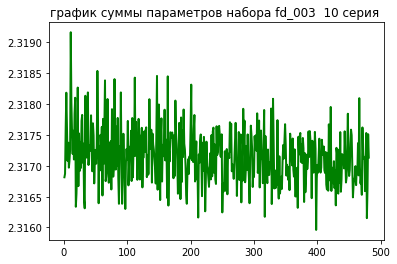

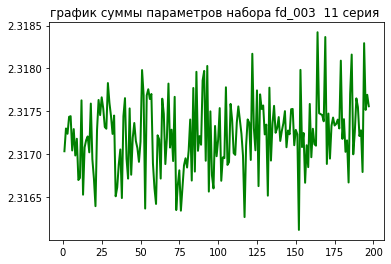

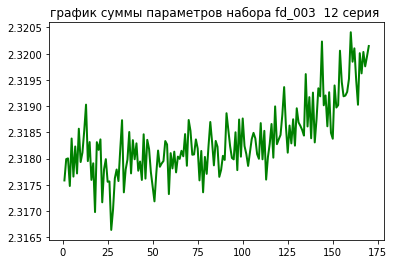

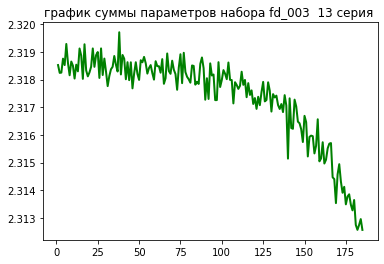

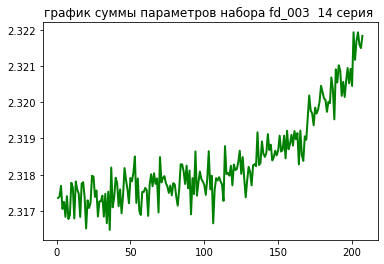

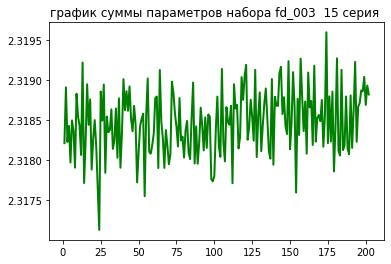

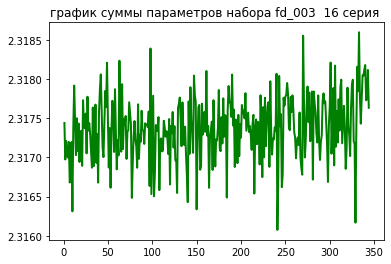

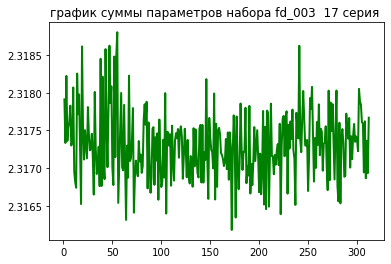

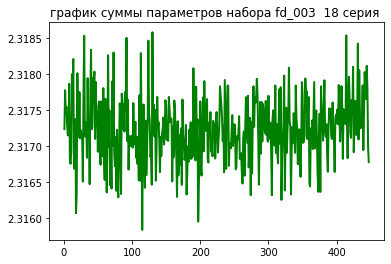

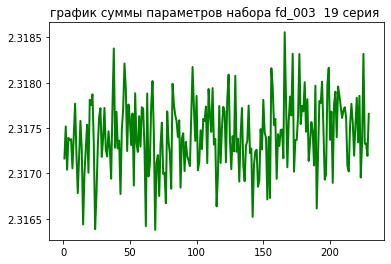

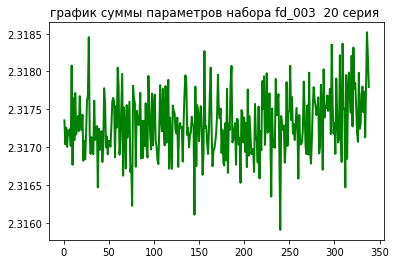

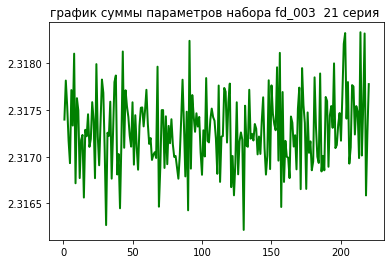

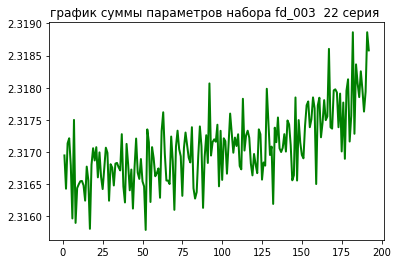

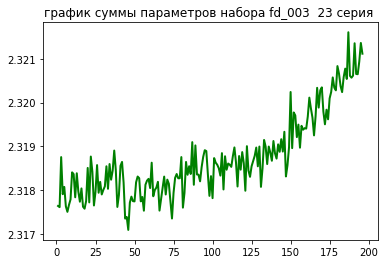

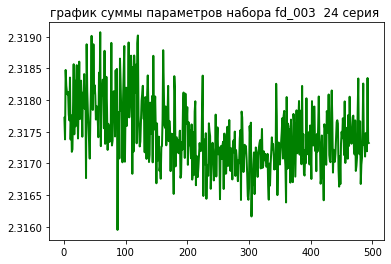

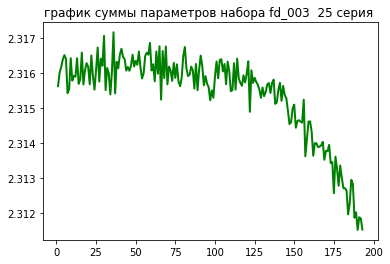

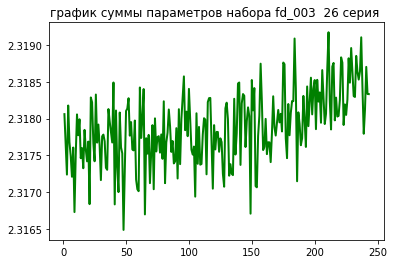

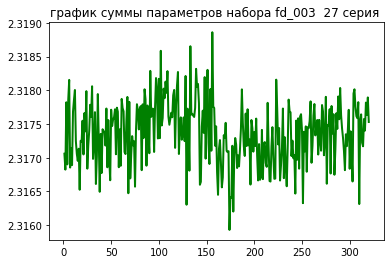

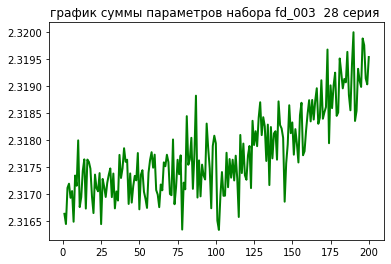

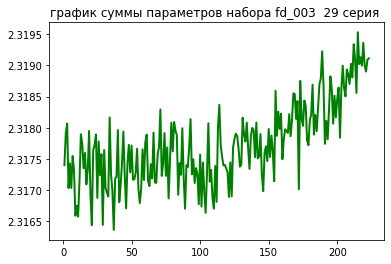

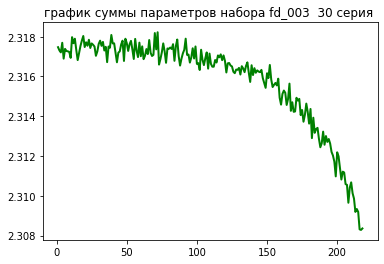

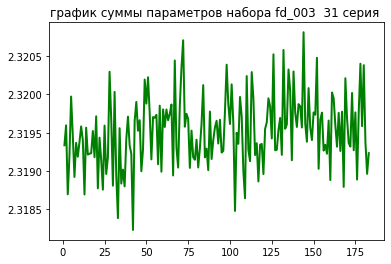

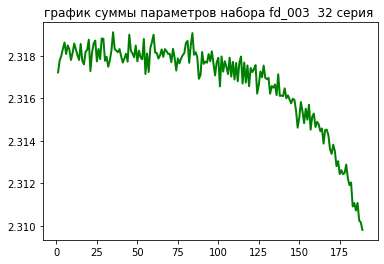

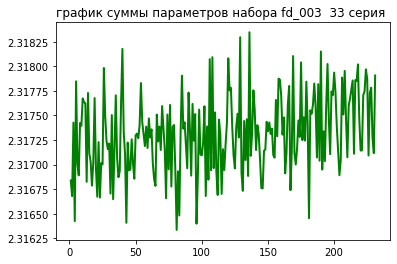

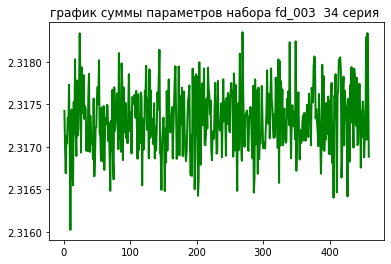

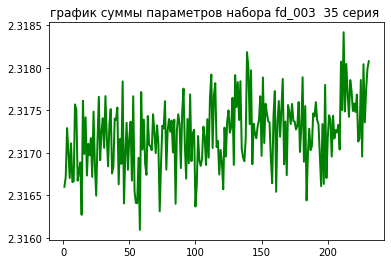

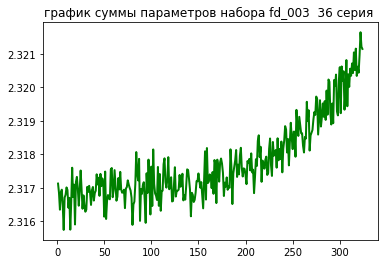

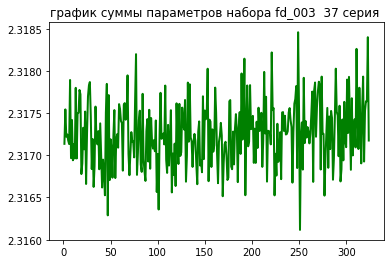

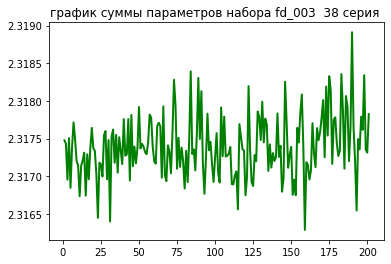

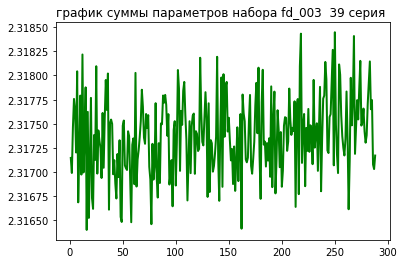

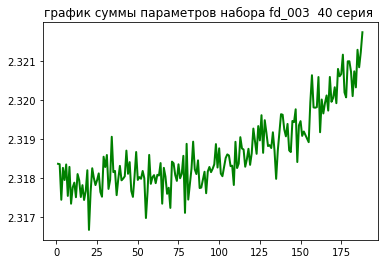

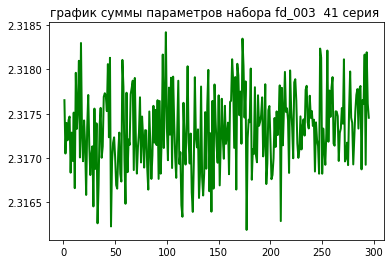

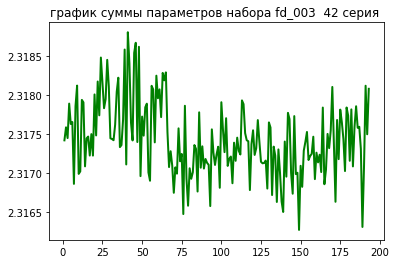

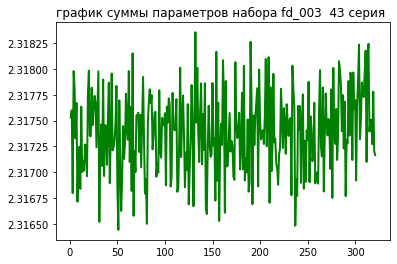

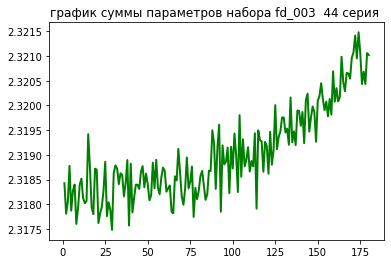

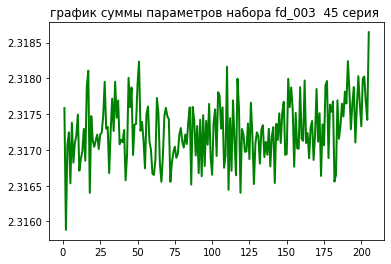

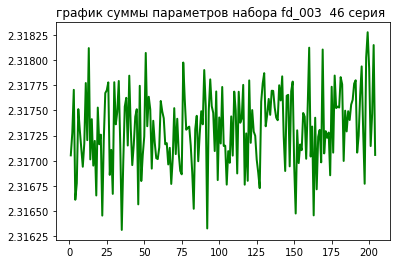

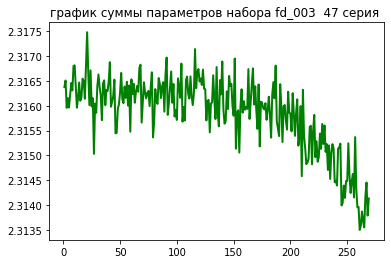

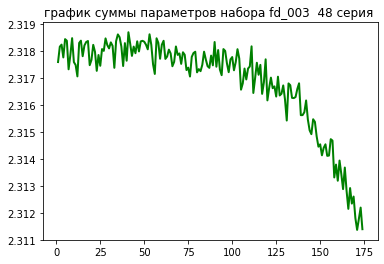

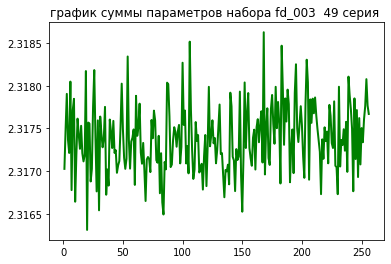

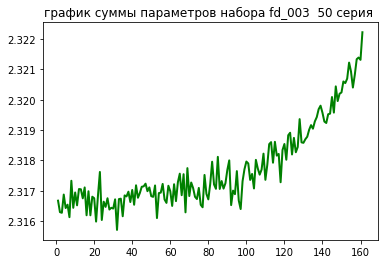

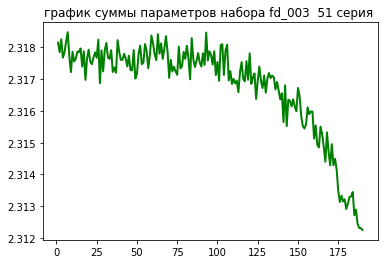

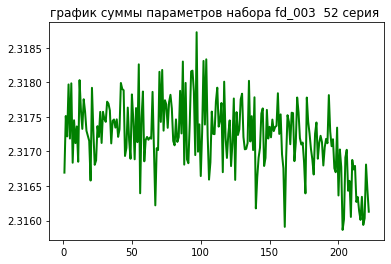

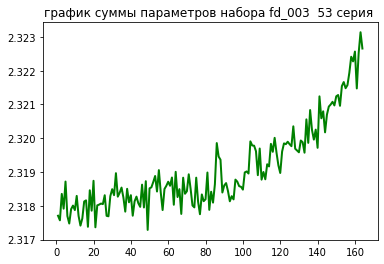

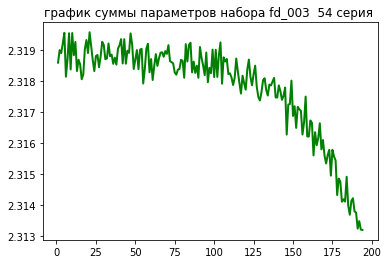

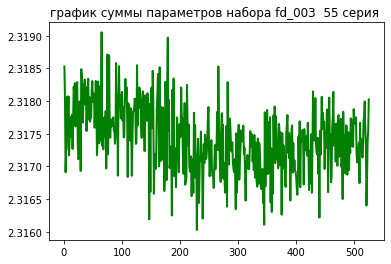

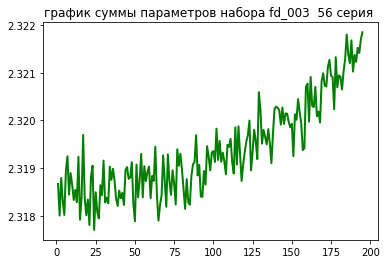

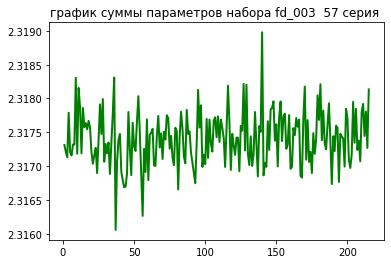

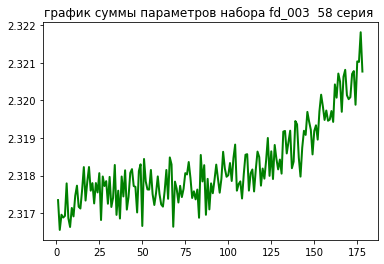

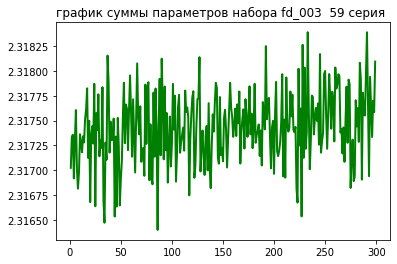

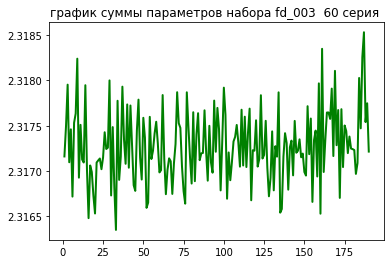

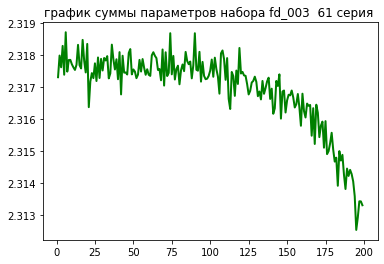

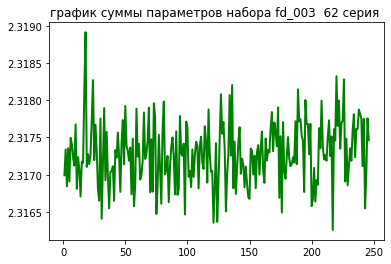

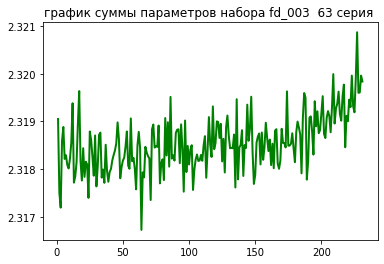

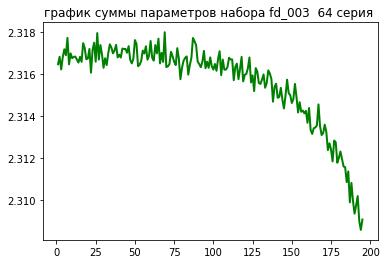

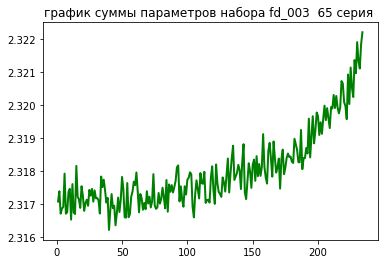

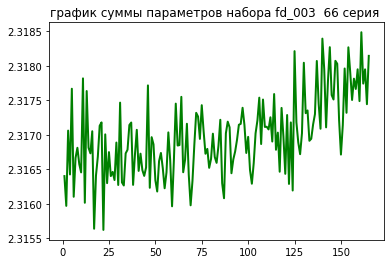

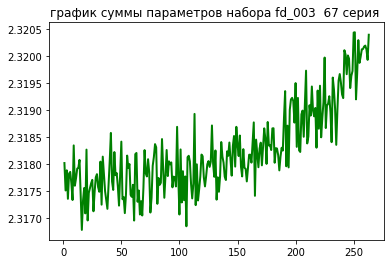

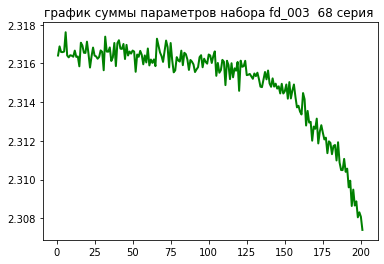

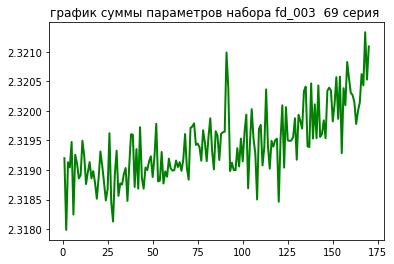

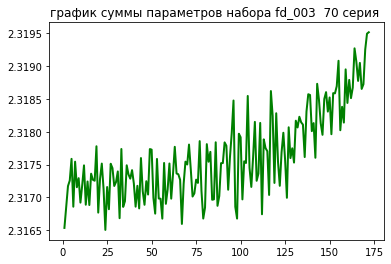

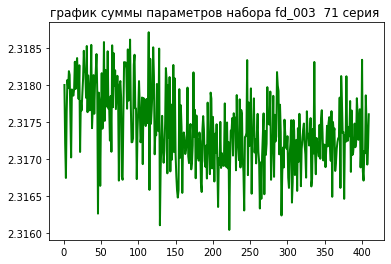

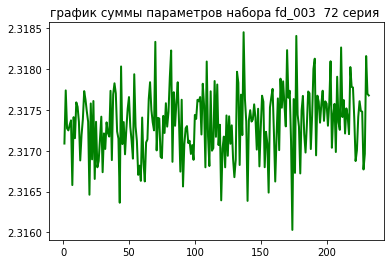

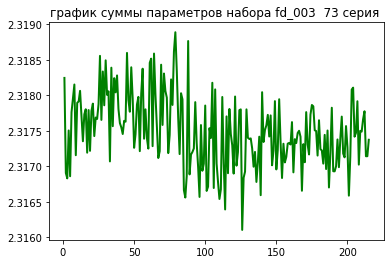

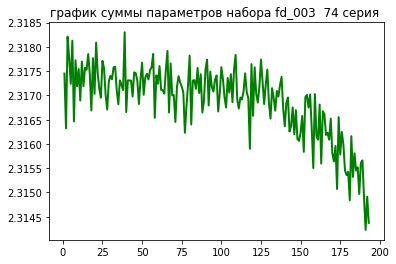

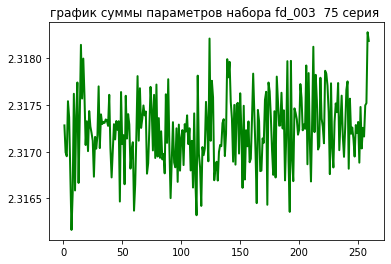

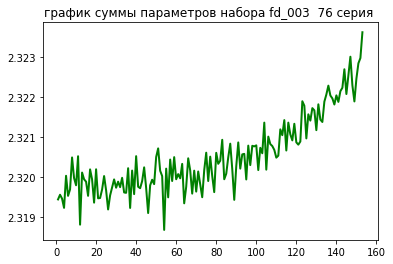

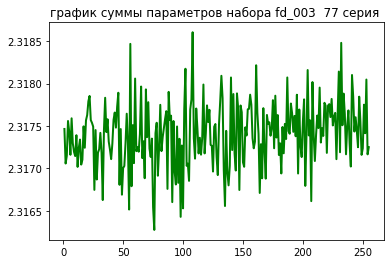

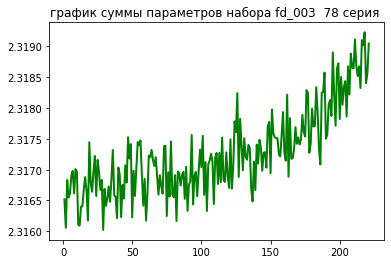

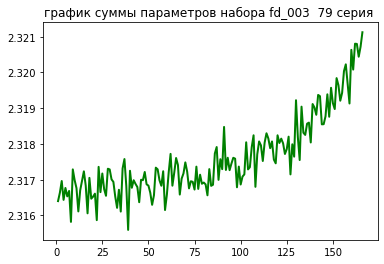

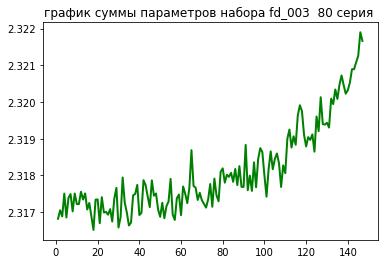

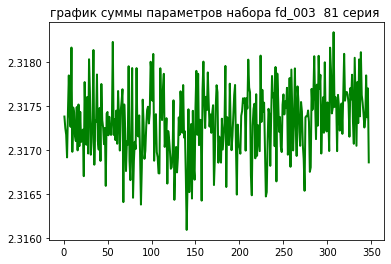

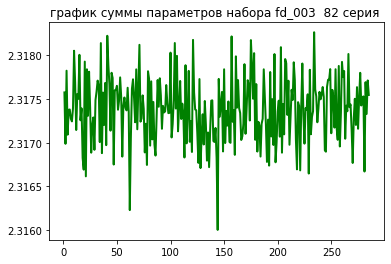

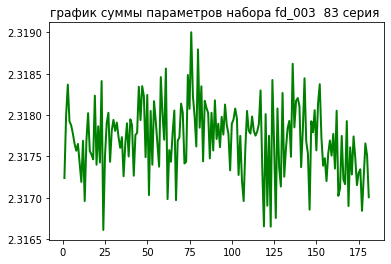

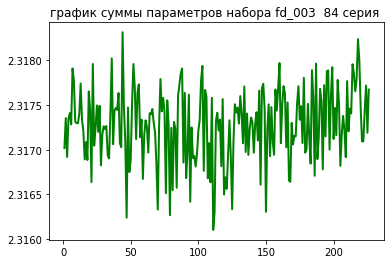

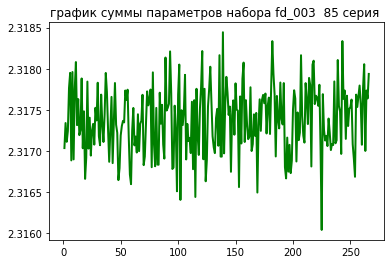

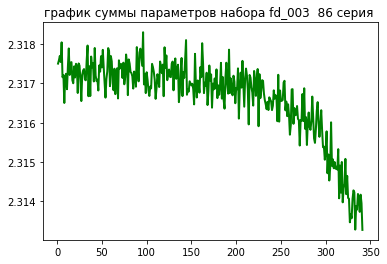

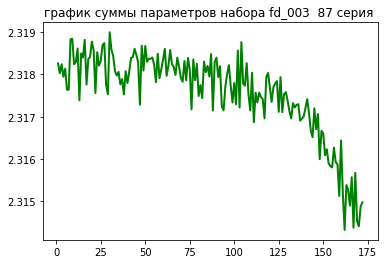

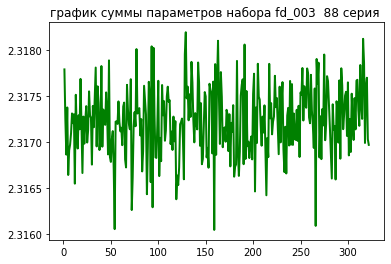

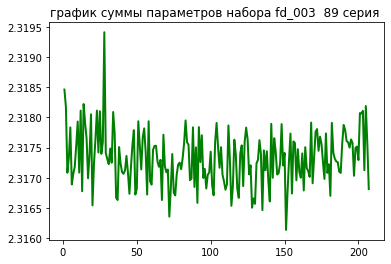

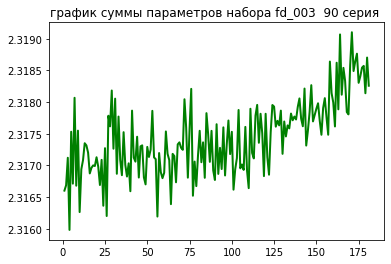

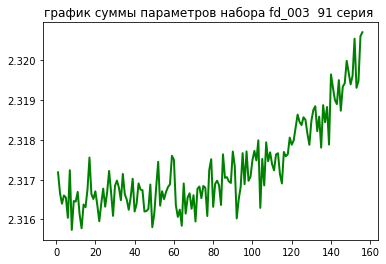

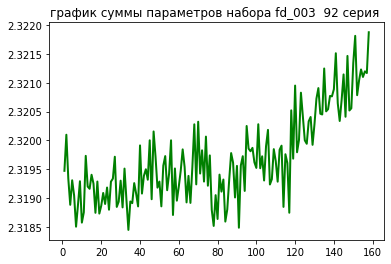

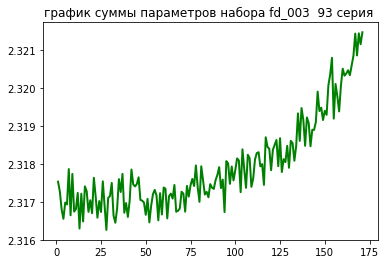

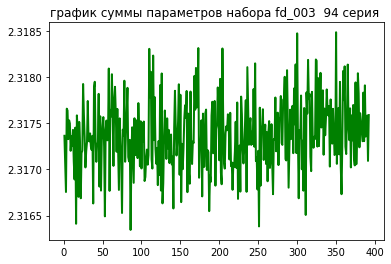

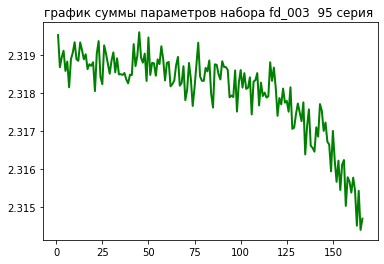

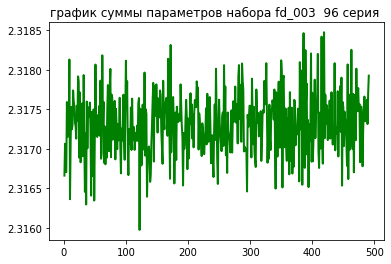

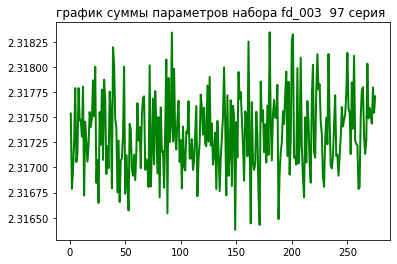

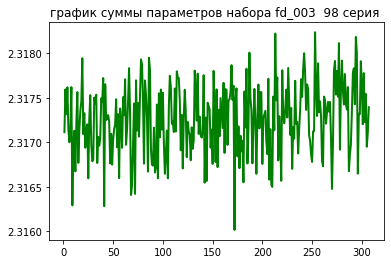

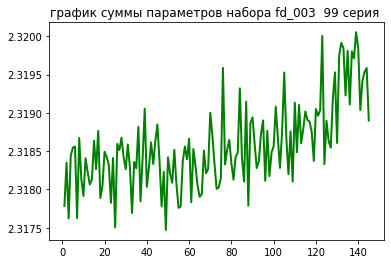

In [287]:
sample_len = fd_003_train[0].max()
for i in range(1,sample_len):
    series = fd_003_train[fd_003_train[0]==i]
    X = series.drop(columns=[0,1])
    X = normalize(X)
    sum_x = X.sum(axis=1)
    x = np.linspace(1, len(sum_x), len(sum_x))[:, np.newaxis]
    plt.title(f'график суммы параметров набора fd_003  {i} серия ')
    plt.plot(x, sum_x, c="g", linewidth=2)
    plt.show()

In [116]:
from sklearn.preprocessing import normalize

In [285]:
# графики для параметров в рамках одной серии  испытаний до поломки
n=13
# здесь формируем серию по номеру испытания из датасета, номер испытания n задается в условии фильтрации
#                                                                       fd_001_train[fd_001_train[0]==n]
series = fd_001_train[fd_001_train[0]==n]
X = series.drop(columns=[0,1])
X = normalize(X)

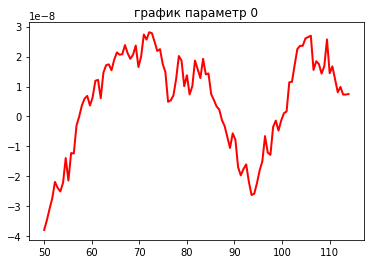

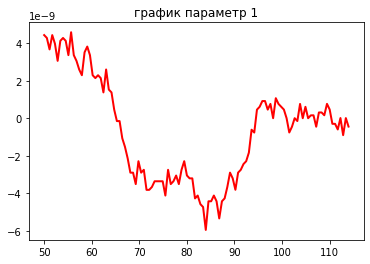

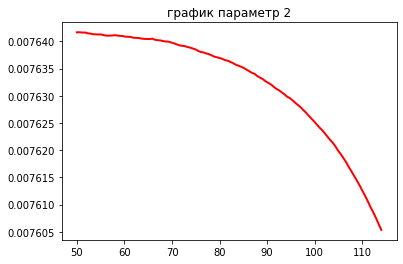

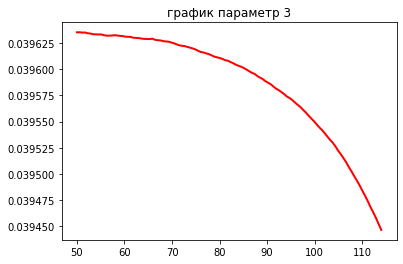

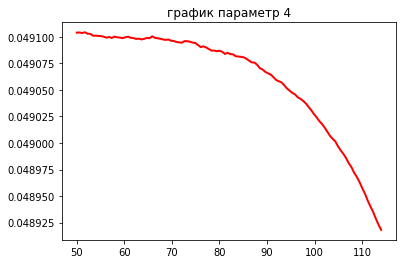

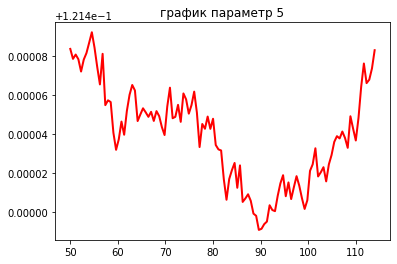

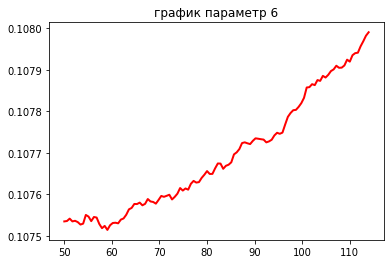

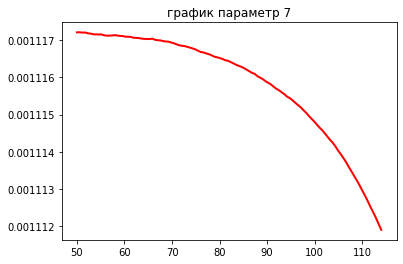

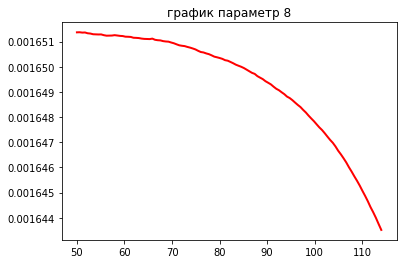

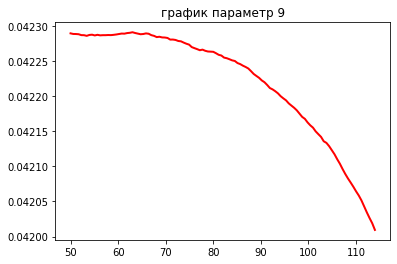

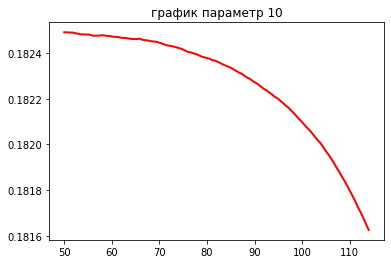

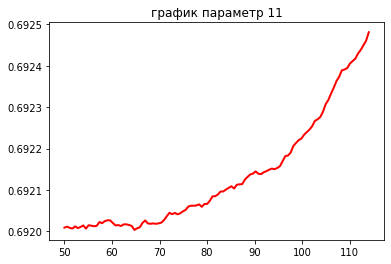

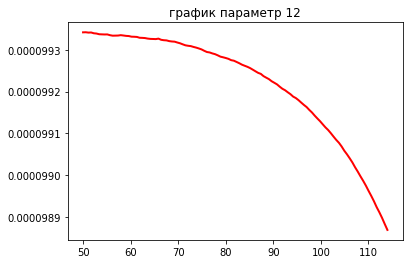

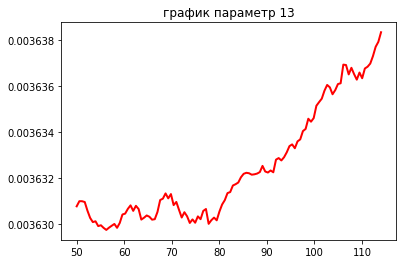

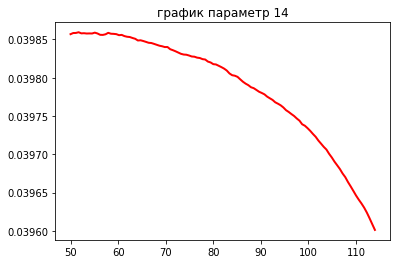

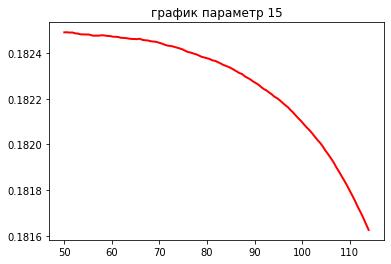

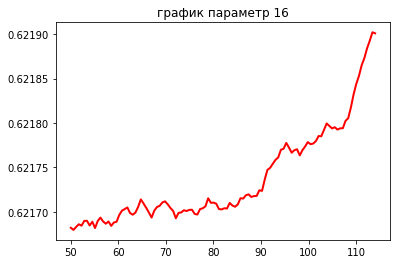

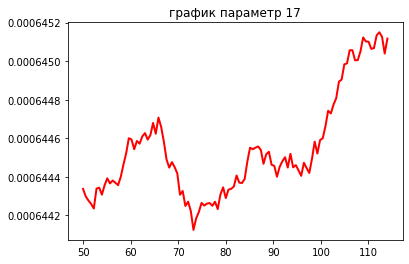

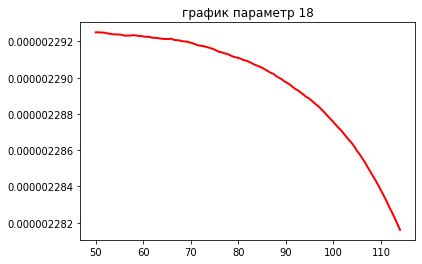

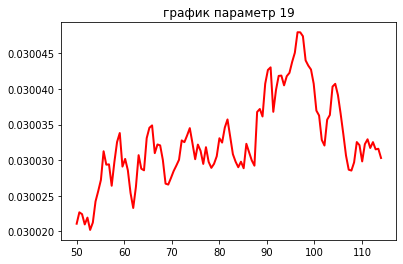

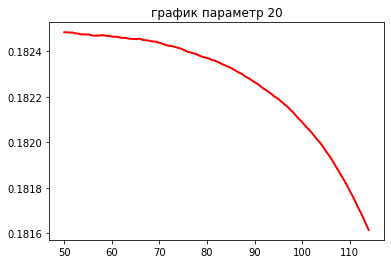

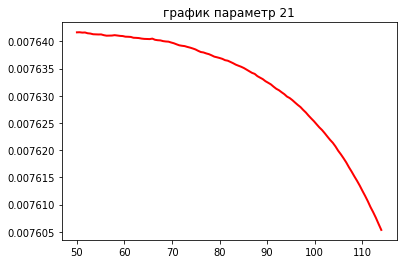

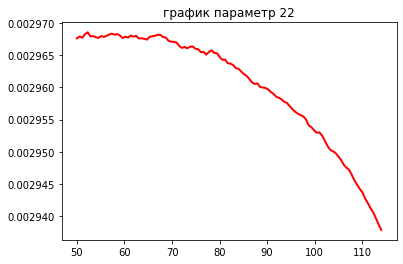

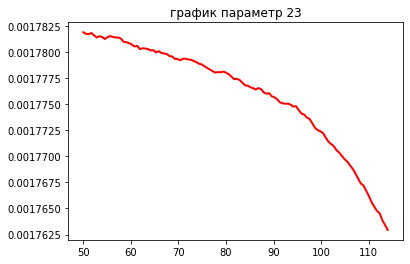

In [286]:
period = 50 # период в циклах для скользящей средней
x = np.linspace(period, len(X[:,1]) - period + 1, len(X[:,1]) - period + 1)[:, np.newaxis]
for i in range(len(X[1])):
    #sum_x = X.sum(axis=1)
    avg = SMA(X[:,i],period)
    plt.title(f'график параметра {i}')
    plt.plot(x, avg, c="r", linewidth=2)
    plt.show()

In [ ]:
#9,10    14,20,22,23

In [206]:
fd_001_train[0].max()

100

In [ ]:
# отрисовка графиков 1 параметра для всех серий испытаний датасета

In [250]:
def deviation_value(data):
    dev_val = []
    for i in range(1,len(data)):
        dev_val.append(abs(data[0] - data[i]))
    return dev_val
        

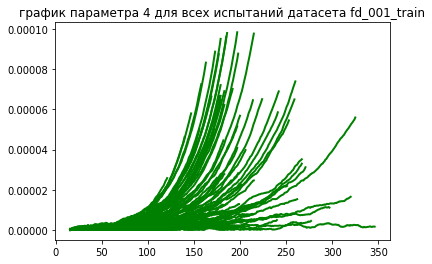

In [265]:
# графики для всех испытаний
period = 16
param = 4
for i in range(1,fd_001_train[0].max()):
    series = fd_001_train[fd_001_train[0]==i]
    X=normalize(series)
    x = np.linspace(period, len(X[:,param]) - period , len(X[:,param]) - period)[:, np.newaxis]
    avg = SMA(X[:,param],period)
    dv = deviation_value(avg)
    plt.title(f'график параметра {param} для всех испытаний датасета fd_001_train')
    plt.plot(x, dv, c="g", linewidth=2)
plt.show()

In [221]:
series[param]

20246    641.69
20247    641.93
20248    642.21
20249    642.49
20250    642.25
          ...  
20426    643.72
20427    643.52
20428    643.96
20429    644.10
20430    643.93
Name: 6, Length: 185, dtype: float64